In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [75]:
N = 500
def walk(steps):
    '''
    Simulates random walk in 2D.

    Args:
        steps: int - number of steps in a walk
    Returns:
        (x,y): tuple - contains two arrays (coordinates for each step)
    '''
    x = np.zeros(steps)
    y = np.zeros(steps)
    for step in range(steps):
        theta = np.random.uniform(0,2*np.pi)
        r = abs(np.random.normal(0,1,1))
        x[step] = x[step-1] + np.cos(theta)*r
        y[step] = y[step-1] + np.sin(theta)*r
    return (x,y)

In [88]:
a,b = walk(N)

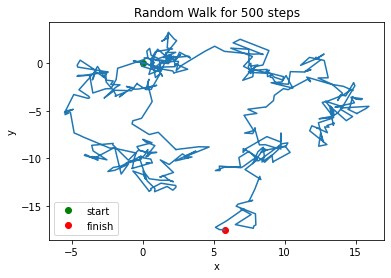

In [89]:
plt.plot(a[0],b[0],'go')
plt.plot(a[-1],b[-1],'ro')
plt.legend(['start','finish'])
plt.plot(a,b)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Random Walk for {} steps'.format(N))
plt.show()

In [90]:
def walk_dist(steps):
    '''
    Similarly to the function walk simulates random walk in 2D but it returns only a distance
    after a number of steps
        
    Args:
        steps: int - number of steps in a walk
    Returns:
        np.sqrt(x**2+y**2): float - distance after a number of steps (the walk begins at a point (00))
    '''
    x = 0
    y = 0
    for step in range(steps):
        theta = np.random.uniform(0,2*np.pi)
        r = abs(np.random.normal(0,1,1))
        x += np.cos(theta)*r
        y += np.sin(theta)*r
    return (np.sqrt(x**2+y**2))

In [91]:
ys = []
y = []
for j in range(0,210,10):
    for i in range(150):
        y.append(walk_dist(j))
    ys.append(np.mean(y))

xs = np.linspace(0,200,21)

/home/radek/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


/home/radek/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


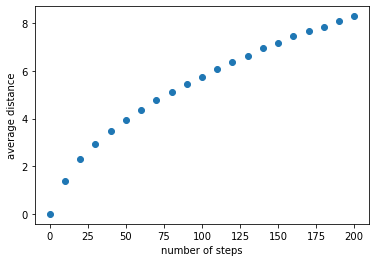

In [92]:
plt.plot(xs,ys,'o')
plt.xlabel('number of steps')
plt.ylabel('average distance')
plt.show()

In [93]:
def f(x,a,b,c):
    return a + b * np.sqrt(x + c)

popt, pcov = curve_fit(f,xs,ys)
popt

array([-0.5853262 ,  0.63135629,  0.80368186])

/home/radek/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


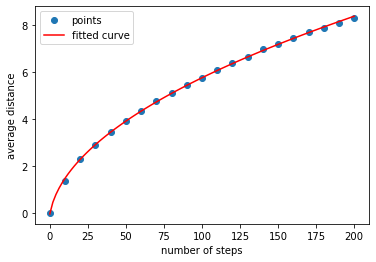

In [94]:
X = np.linspace(0,200,100)

plt.plot(xs,ys,'o')
plt.plot(X, f(X,*popt), 'r')
plt.xlabel('number of steps')
plt.ylabel('average distance')
plt.legend(['points','fitted curve'])
plt.show()